In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [4]:
os.chdir('/home/ubuntu/jupyter/James_Yeh/popular_program_language/')
os.chdir(os.path.join(os.getcwd(), './data_final'))
#os.chdir()改变目录  
#os.path.join()将分离的各部分组合成一个路径名
#getcwd()取得当前工作目录
files = os.listdir()
for file in files:
    print(file)

518.csv
linkedin.csv
pttTech.csv
104.csv
123.csv
pttSoft.csv


In [14]:
lang_str = 'C|C++|C#|PYTHON|JAVA|JAVASCRIPT|PHP|HTML|SQL|CSS|R|RUBY|PERL|SCALA|SWIFT|GO|MYSQL|Objective-c|VB|jQuery|ASP.NET'
language = lang_str.split('|')     #list

# Initail all items = 0
all_result = {key.upper():0 for key in language}

asp_regex = '.net|ASP'
c_sharp_regex = 'C#.NET'
vb_regex = 'VB.NET|VBA|Visual basic|visual'

for file in files:                                               #將每個檔案取出
    with open(file, 'r', encoding='utf-8') as f:                #讀取每個檔案
        pairs = f.read().strip().split('\n')                   #list
#         pairs = [pair for pair in pairs if len(pair) > 0]
        lan = [pair.split(',')[0].upper() for pair in pairs]   #取第一個索引值  同時變大寫
        counts = [pair.split(',')[1] for pair in pairs]        #取第二個索引值
        
        result = dict(zip(lan, counts))        # {k:v for (k,v) in zip(lan, couonts)}
        for key in result.keys():                   #每個檔案(result is dict)的keys()
            if key in all_result.keys():                         #如果有在all_result裡   
                all_result[key] += int(result[key])                  # += file的val
            if re.match(asp_regex, key, re.IGNORECASE):          # 比對asp_regex
                all_result['ASP.NET'] += int(result[key]) 
            if re.match(c_sharp_regex, key, re.IGNORECASE):     # 比對c_sharp_regex
                all_result['C#'] += int(result[key])        
            if re.match(vb_regex, key, re.IGNORECASE):         # 比對vb_regex
                all_result['VB'] += int(result[key]) 

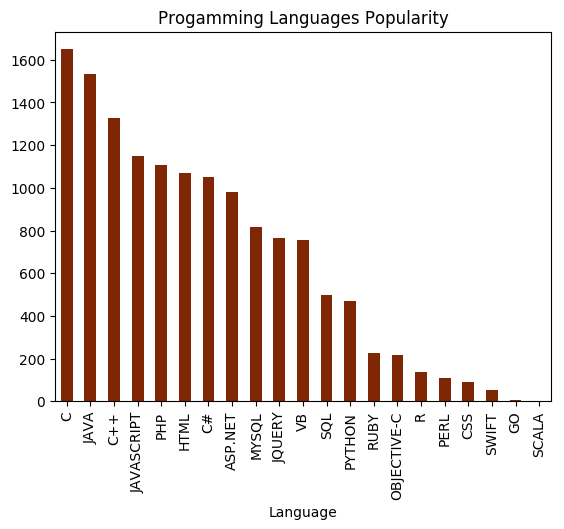

In [39]:
# Method-1

result_list = [(k,v) for (k,v) in all_result.items()]    #dict => list[tuple]

df = pd.DataFrame(result_list)                  # list => pandas       
df.columns = ['Language', 'Counts']             # **columns命名**
df = df.set_index(['Language'], drop=True)  #drop : Delete columns to be used as the new index
         # df.index = ['Language']
    
# Sort dataframe
sort_df = df.sort_values(by="Counts", ascending=False)
#pandas.sort_values(by = " ",  ascending = Sort ascending vs. descending(False)降冪 )

# Plot chart
plt.figure(figsize=(100,100))    #plt.figure(figsize=(x,x))
sort_df.plot(kind='bar', title='Progamming Languages Popularity', fontsize=10, legend=False, colormap='Oranges_r')
# sort_df.plot(kind='line', colormap='Oranges_r')     #pandas.plot()

# print(sort_df)    #pandas
plt.show()
#pandas繪圖   plot畫圖呈現

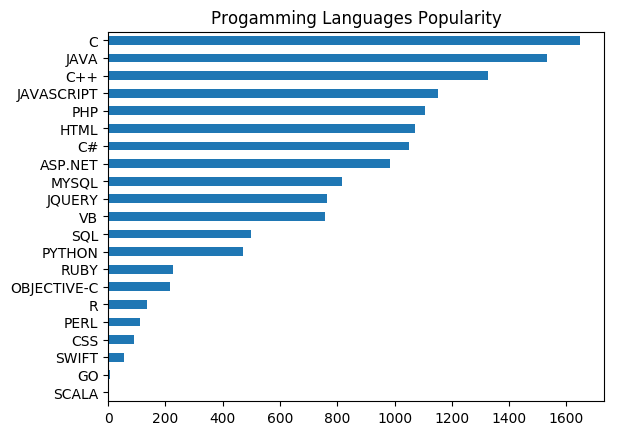

In [64]:
# Method-2
#Q2
Languages = [key for key in all_result.keys()]
Counts = [value for value in all_result.values()]

df2 = pd.DataFrame(Counts, index=Languages, columns=['Counts'])   # **Counts**
# df2 = pd.Series(Counts, index=pd.Series(Languages))    #Alternative way to create series

sort_df2 = df2.sort_values(by="Counts", ascending=True)   #by Counts sorted

plt.figure(figsize=(100,100))   #plt.figure(figsize=(x,x))  
sort_df2.plot(kind='barh', title='Progamming Languages Popularity', fontsize=10, legend=False)
# print(sort_df2)
plt.show()

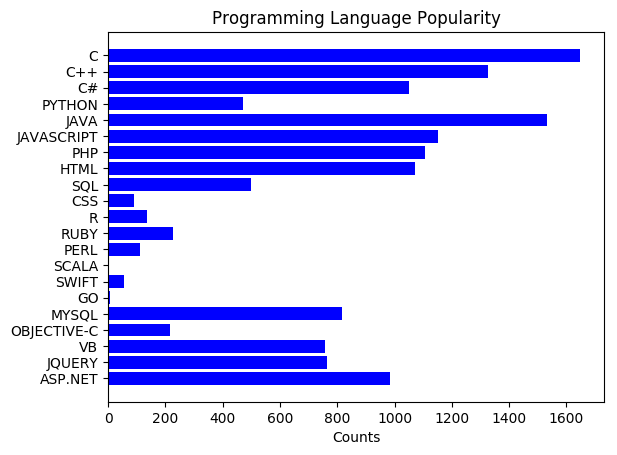

In [77]:
# Method-3
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

sorted_result = sorted(all_result.items(), key=lambda x:x[1], reverse=True)   #dict => list
#soeted(dict.items() dict取值 , key = lambda x:x[1], reverse反轉)   值傳入x : 取x的第一索引值 

sorted_result = OrderedDict(sorted_result)             #list => OrderedDict

Languages = [key for key in sorted_result.keys()]       #dict.keys() => list

Counts = [value for value in sorted_result.values()]    #dict.values() => list

plt.rcdefaults()                   #
fig, ax = plt.subplots()           #

# lang = tuple(Languages)           #tuple(list[])
y_pos = np.arange(len(Languages))         #array([0, 1, 2, 3, 4])
error = np.random.rand(len(Languages))    #array([ 0.27709615,  0.46388414,  0.8211876 ,  0.45088707,  0.97060583])

ax.barh(y_pos, Counts, align='center', color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(Languages)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Counts')
ax.set_title('Programming Language Popularity')

plt.show()

In [53]:
# Languages = [key for key in all_result.keys()]
lan_list = []
for lan2 in sorted_result:
#     print(lan2[0])
    lan_list.append(lan2[0])
print(lan_list)

['C', 'JAVA', 'C++', 'JAVASCRIPT', 'PHP', 'HTML', 'C#', 'ASP.NET', 'MYSQL', 'JQUERY', 'VB', 'SQL', 'PYTHON', 'RUBY', 'OBJECTIVE-C', 'R', 'PERL', 'CSS', 'SWIFT', 'GO', 'SCALA']


In [71]:
lang
Languages
# sorted_result
len(all_result)
sorted_result

[('C', 1649),
 ('JAVA', 1532),
 ('C++', 1326),
 ('JAVASCRIPT', 1150),
 ('PHP', 1105),
 ('HTML', 1070),
 ('C#', 1050),
 ('ASP.NET', 983),
 ('MYSQL', 818),
 ('JQUERY', 764),
 ('VB', 757),
 ('SQL', 499),
 ('PYTHON', 471),
 ('RUBY', 227),
 ('OBJECTIVE-C', 215),
 ('R', 137),
 ('PERL', 110),
 ('CSS', 91),
 ('SWIFT', 54),
 ('GO', 7),
 ('SCALA', 0)]

In [66]:
result_dict = { idx for idx in sorted_result}
result_dict

{('ASP.NET', 983),
 ('C', 1649),
 ('C#', 1050),
 ('C++', 1326),
 ('CSS', 91),
 ('GO', 7),
 ('HTML', 1070),
 ('JAVA', 1532),
 ('JAVASCRIPT', 1150),
 ('JQUERY', 764),
 ('MYSQL', 818),
 ('OBJECTIVE-C', 215),
 ('PERL', 110),
 ('PHP', 1105),
 ('PYTHON', 471),
 ('R', 137),
 ('RUBY', 227),
 ('SCALA', 0),
 ('SQL', 499),
 ('SWIFT', 54),
 ('VB', 757)}